In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)

# Print the dataset
print(dataset.head())

   Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0


In [ ]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
#To inspect the shape of the datset
dataset.shape

(2547994, 2)

In [ ]:
# Movie Id
dataset[dataset['Rating'].isnull()]

,Cust_Id,Rating
0,1:,NaN
548,2:,NaN
694,3:,NaN
2707,4:,NaN
2850,5:,NaN
...,...,...
2497789,465:,NaN
2497890,466:,NaN
2498253,467:,NaN
2499309,468:,NaN


In [ ]:
# get movie count by counting nan values
movie_count = dataset.isnull().sum()[1]

movie_count


469

In [ ]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
p

,count
Rating,
1.0,117127
2.0,248343
3.0,707906
4.0,884641
5.0,589508


In [ ]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

361168

In [ ]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count
rating_count

2547525

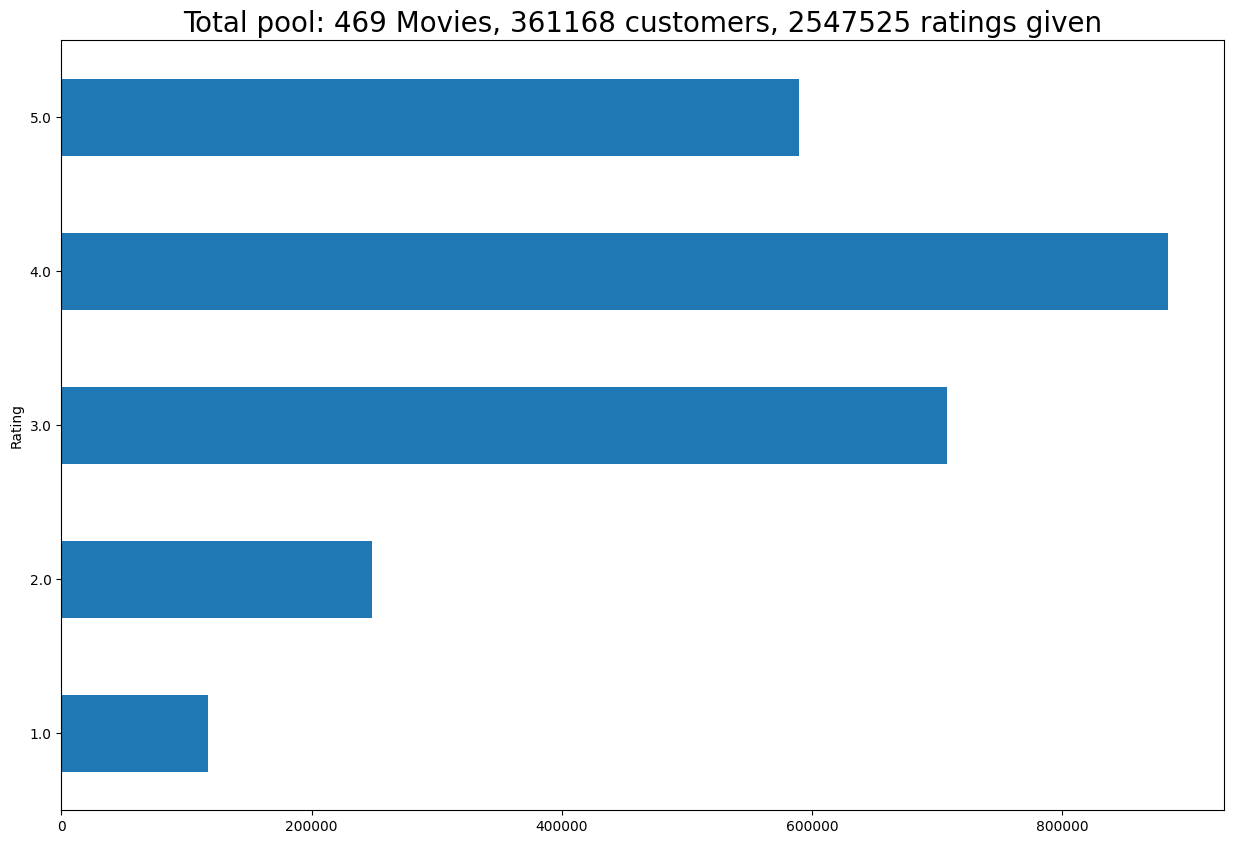

In [ ]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.show()
#plt.axis('off')

In [ ]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()


,Rating
0,True
1,False
2,False
3,False
4,False


In [ ]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(469, 1)

In [ ]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
2497789,True
2497890,True
2498253,True
2499309,True


In [ ]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()

df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
#To create a numpy array containing movie ids according the 'ratings' dataset
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 468. 468. 468.]
Length: 2547525


In [ ]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset')
dataset.head()

-Dataset


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
dataset.tail()

,Cust_Id,Rating,Movie_Id
2547988,859014,4.0,468
2547989,1296411,3.0,468
2547990,2347755,3.0,468
2547991,877145,5.0,468
2547992,181816,5.0,468


In [ ]:
dataset.shape

(2547525, 3)

In [ ]:
f = ['count','mean']

In [ ]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 2149.0


In [ ]:
movie_benchmark

2149.0

In [ ]:
f = ['count','mean']
#count and mean

In [ ]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')


Customer minimum times of review: 8.0


In [ ]:
#removing all the movies rated less often
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]

dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (1687822, 3)


In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
5106,824097,2.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8


In [ ]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(111988, 141)


In [ ]:
df_p.head()

Movie_Id,8,16,17,18,26,28,30,33,44,45,...,438,442,443,445,452,456,457,459,463,468
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,3.0
7,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0
59,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0
79,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_title = pd.read_csv('/content/movie_titles (1).csv',encoding='Latin-1',header=None,names=['Movie_Id', 'Year', 'Name'],on_bad_lines='skip',index_col='Movie_Id')
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [ ]:
df_title.shape

(17434, 2)

In [ ]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
!pip install surprise

In [ ]:
# Load Reader library
reader = Reader()
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)
# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9635  0.9622  0.9653  0.9637  0.0013  
MAE (testset)     0.7578  0.7576  0.7601  0.7585  0.0012  
Fit time          36.22   31.26   33.46   33.65   2.03    
Test time         7.04    7.99    6.32    7.11    0.68    


{'test_rmse': array([0.96346502, 0.96222162, 0.96530192]),
 'test_mae': array([0.75780401, 0.75755574, 0.76014134]),
 'fit_time': (36.22241830825806, 31.263230562210083, 33.463335037231445),
 'test_time': (7.036852836608887, 7.985481023788452, 6.315732955932617)}

In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
5106,824097,2.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8


In [ ]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
457                    Kill Bill: Vol. 2
Name: Name, dtype: object

In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 20 recommendations
user_712664.head(20)

,Year,Name,Estimate_Score
67,2004.0,Invader Zim,5.000000
197,1978.0,The Deer Hunter,4.961874
308,1994.0,Ed Wood,4.926739
239,1959.0,North by Northwest,4.846458
173,1992.0,Reservoir Dogs,4.832232
418,1998.0,Happiness,4.816562
221,2003.0,Chappelle's Show: Season 1,4.807553
313,1999.0,Futurama: Monster Robot Maniac Fun Collection,4.777433
207,1996.0,Star Trek: Deep Space Nine: Season 5,4.766510
345,1988.0,The Last Temptation of Christ,4.755305
